In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
import scipy
from scipy.optimize import curve_fit

#### load data

In [52]:
input_csv = "vidro-2kHz-80mBias3.csv"

df = pd.read_csv(input_csv, comment='#', names=['x', 'y', 'p', 't'])
df.head()

,x,y,p,t
0,635,344,1,6560
1,636,596,1,6560
2,637,316,0,6560
3,633,343,1,6560
4,638,192,1,6561


### Filter (small region just to calculate phase per pixel) and see the ROI


Number of data points: 466
           x    y  p        t
9096250  633  226  1  1100700
9096251  636  226  1  1100700
9096252  637  225  1  1100700
9096253  635  224  1  1100700
9096254  634  254  0  1100700
...      ...  ... ..      ...
9096719  633  392  0  1100779
9096720  636  263  1  1100779
9096721  637  494  1  1100780
9096722  634  268  1  1100780
9096723  634  595  0  1100780

[466 rows x 4 columns]
Time range: 1100700 to 1100780
Filtered data:
     x    y  p        t
0  633  226  1  1100700
1  636  226  1  1100700
2  637  225  1  1100700
3  635  224  1  1100700
4  634  254  0  1100700
Number of events: 466
Density array shape: (265468,)
Density indices shape: (466,)
Max density index: 265435
Min density index: 2057
Densities size: 265468
Density indices (first 10): [ 85652  85652  85120  84588 100548  99484  95228  95228  84056  83524]


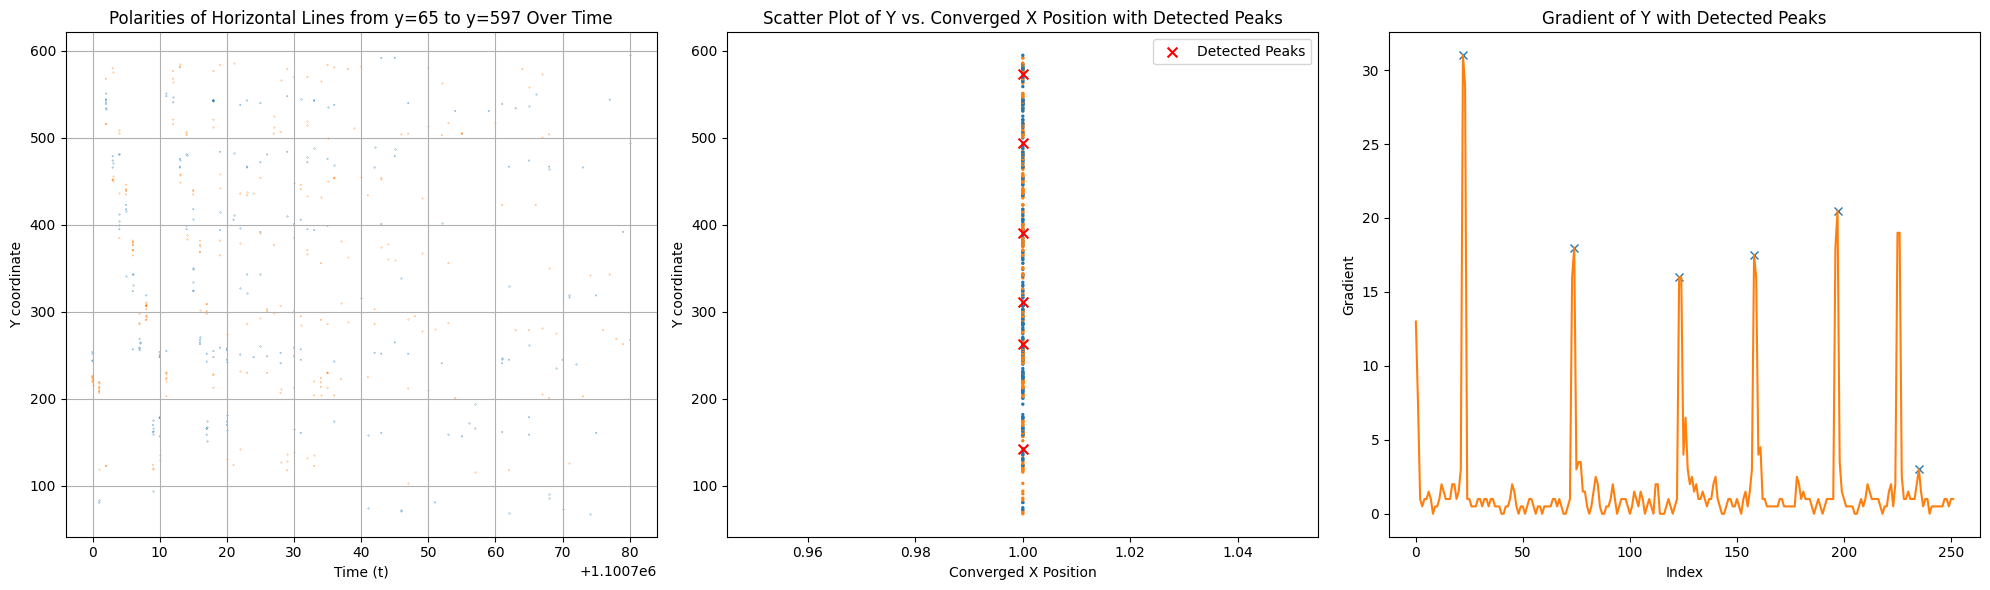

[143 263 311 391 494 574]


In [101]:
from polarityarea2 import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define the parameters
tmin = 1100700
tmax = 1100780
ymin = 65
ymax = 597
xmin = 633
xmax = 675
polarity = None

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()

# Sort the data based on y
x = line_df['x'].to_numpy()
y = line_df['y'].to_numpy()
t = line_df['t'].to_numpy()
p = line_df['p'].to_numpy()

idx = np.argsort(y)
x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

# Separate the data based on polarity
yp = y[p == 1]
yn = y[p == 0]

# Calculate the gradient of yp
gradyp = np.gradient(yp)

# Find peaks in the gradient of the y data for polarity = 1
peaksidx, _ = find_peaks(gradyp, distance=30, prominence=2)

# Create the ysplit and phisplit arrays
ysplit = yp[peaksidx]
phisplit = np.arange(0, 2 * np.pi * len(ysplit), 2 * np.pi)

# Create a subplot grid with 1 row and 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# First plot: Using plot_lines_polarity_over_time
plot_lines_polarity_over_time(input_csv, xmin, xmax, ymin, ymax, tmin, tmax, polarity, ax=ax1)

# Second plot: Scatter plot of y vs. position (converged x)
colors = ["C0", "C1"]
colors_vec = [colors[p] for p in line_df['p']]

# Set all x positions to the same value (e.g., 1) to align them vertically
converged_x = np.ones(len(t))
ax2.scatter(converged_x, y, s=2, c=colors_vec)

# Overlay the detected peaks on the scatter plot
ax2.scatter(converged_x[peaksidx], yp[peaksidx], s=50, c="red", marker="x", label="Detected Peaks")

# Configure labels and title for the second plot
ax2.set_xlabel('Converged X Position')
ax2.set_ylabel('Y coordinate')
ax2.set_title('Scatter Plot of Y vs. Converged X Position with Detected Peaks')
ax2.legend()

# Third plot: Gradient of y with peaks
ax3.plot(peaksidx, abs(gradyp[peaksidx]), "x")
ax3.plot(gradyp)
ax3.set_title('Gradient of Y with Detected Peaks')
ax3.set_xlabel('Index')
ax3.set_ylabel('Gradient')

plt.tight_layout()
plt.show()

print(ysplit)


In [102]:
phisplit

array([ 0.        ,  6.28318531, 12.56637061, 18.84955592, 25.13274123,
       31.41592654])

[0.         0.05235988 0.10471976 0.15707963 0.20943951 0.26179939
 0.31415927 0.36651914 0.41887902 0.4712389  0.52359878 0.57595865
 0.62831853 0.68067841 0.73303829 0.78539816 0.83775804 0.89011792
 0.9424778  0.99483767 1.04719755 1.09955743 1.15191731 1.20427718
 1.25663706 1.30899694 1.36135682 1.41371669 1.46607657 1.51843645
 1.57079633 1.6231562  1.67551608 1.72787596 1.78023584 1.83259571
 1.88495559 1.93731547 1.98967535 2.04203522 2.0943951  2.14675498
 2.19911486 2.25147474 2.30383461 2.35619449 2.40855437 2.46091425
 2.51327412 2.565634   2.61799388 2.67035376 2.72271363 2.77507351
 2.82743339 2.87979327 2.93215314 2.98451302 3.0368729  3.08923278
 3.14159265 3.19395253 3.24631241 3.29867229 3.35103216 3.40339204
 3.45575192 3.5081118  3.56047167 3.61283155 3.66519143 3.71755131
 3.76991118 3.82227106 3.87463094 3.92699082 3.97935069 4.03171057
 4.08407045 4.13643033 4.1887902  4.24115008 4.29350996 4.34586984
 4.39822972 4.45058959 4.50294947 4.55530935 4.60766923 4.6600

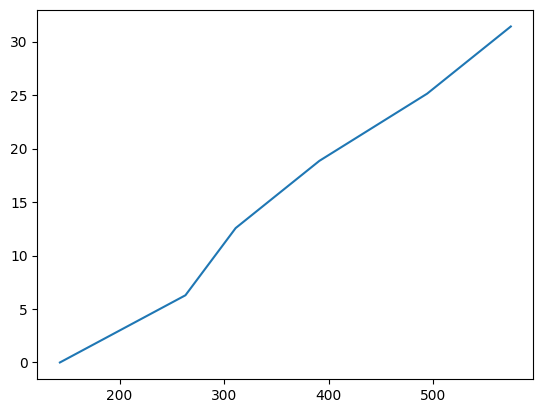

In [103]:
yroi = np.arange(ysplit[0], ysplit[-1] + 1)
phiroi = np.interp(yroi, ysplit, phisplit)
plt.plot(yroi, phiroi)
phiroi = np.mod(phiroi, 2 * np.pi) #between 0,2pi
print(phiroi)

### filter data (main data- bigger time period)

In [104]:
%matplotlib inline
# Define the parameters
tmin = 1100000
tmax = 2000000
ymin = yroi[0]
ymax = yroi[-1]


# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 6915452
            x    y  p        t
9090401   638  194  1  1100000
9090402   637  239  0  1100000
9090404   633  385  0  1100000
9090405   634  384  0  1100000
9090406   633  188  1  1100001
...       ...  ... ..      ...
16587143  636  236  0  2000000
16587144  638  362  1  2000000
16587145  635  233  0  2000000
16587146  635  190  1  2000000
16587147  637  526  0  2000000

[6915452 rows x 4 columns]
Time range: 1100000 to 2000000


### phase per pixel method application

yp: [ 51  45 113 ... 206  47 219]
phase: [2.67035376 2.35619449 5.91666616 ... 2.98451302 2.46091425 4.00553063]
3914031
3914031


(0.0, 2000.0)

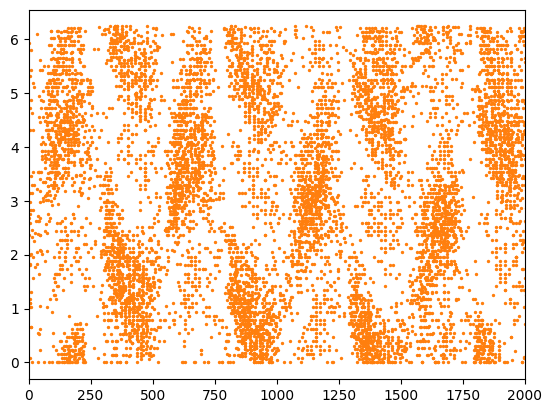

In [105]:

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
p = np.array(p)
t = np.array(t)

idx = np.argsort(t)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

t = t-t[0]

yp = y[p==1]
tp = t[p==1]
yn = y[p==0]

tp = tp-tp[0]

yp = yp-ymin

phase = np.array([phiroi[yi] for yi in yp])

print("yp:", yp)
#print("phiroi:", phiroi[180])
print("phase:", phase)
##yp = np.mod(yp, pixels_per_period)
#yp = np.mod(yp, 84)

tp_uniques = np.unique(tp)

##phase = yp*phaseperpixel
print(len(tp))
print(len(phase))
plt.scatter(tp, phase, s=2, c="C1")
plt.xlim(0,2000)

### Calculation of phase (centroids)

In [106]:
tp_uniques = np.unique(tp)
centroid_y = []
tval_vec = []

for i,tval in enumerate(tp_uniques):
    yval = phase[tp==tval]
    ycomplex = np.cos(yval)+1j*np.sin(yval)

    ymean = np.angle(np.mean(ycomplex))

    
    #print(i, ymean)
    centroid_y.append(ymean)
    tval_vec.append(tval)

    if i > 5500:
        break

centroid_y = np.array(centroid_y)
tval_vec = np.array(tval_vec)


In [107]:
centroid_y,tval_vec

(array([2.67035376, 2.35619449, 1.47071394, ..., 1.46607657, 2.82743339,
        2.91906317]),
 array([   0,    1,    2, ..., 6224, 6225, 6226], dtype=int64))

### phases of events over time

(0.0, 2000.0)

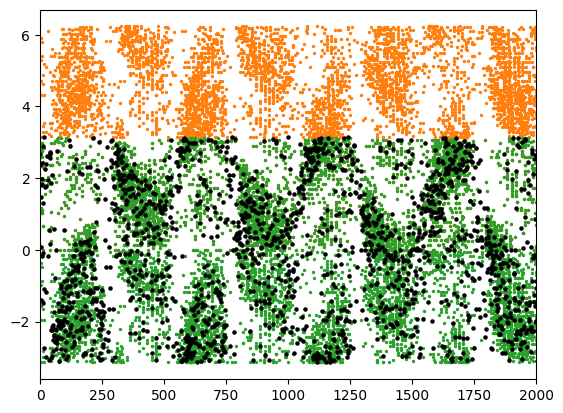

In [108]:
plt.scatter(tp, phase, s=2, c="C1")
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.xlim(0,2000)

### plot of the real and imaginary parts of complex numbers representing phase centroids

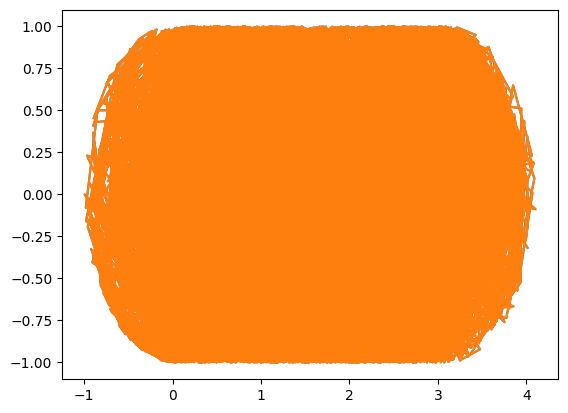

In [109]:
phase_complex = np.cos(centroid_y)+1j*np.sin(centroid_y)

#phase_complex = phase_complex[:100]

plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')
plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')


### Kalman filter to smooth the phase data derived from the centroid phases

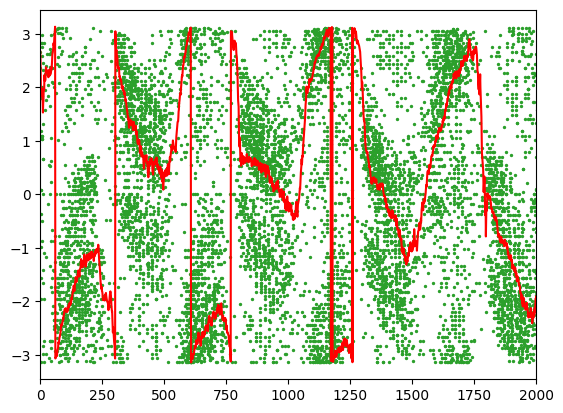

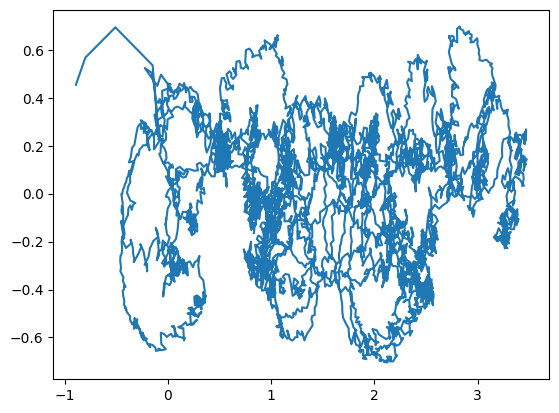

In [110]:
from kalman import KalmanTracking


Track = KalmanTracking()
Track.cov = 0.5 #Sets the initial covariance, representing the uncertainty in the initial state estimate.
Track.error_proc = 0.0001 #Sets the estimated process error, representing how much you expect the process to vary between steps.
Track.error_measurement = 0.075+0.05j #Sets the estimated measurement error, which includes both real and imaginary components.

complex_kalman = np.array([Track(c) for c in phase_complex])
phase_kalman = np.angle(complex_kalman)
#plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')
#plt.plot(phase_kalman.real+tval_vec/10000, phase_kalman.imag, '.')


plt.figure()
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
#plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.plot(tval_vec, phase_kalman, c="r")
plt.xlim(0,2000)

plt.figure()
plt.plot(complex_kalman.real+tval_vec/2000, complex_kalman.imag, '-')


12.314145748029688

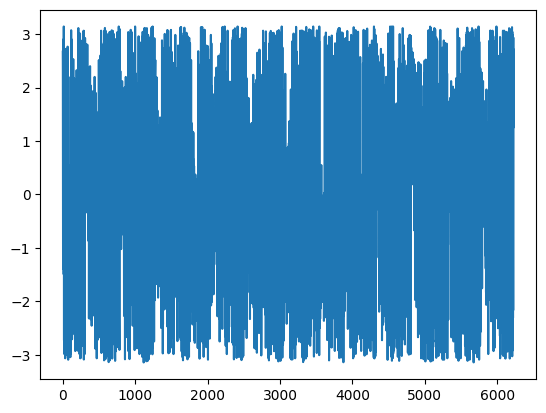

In [111]:
plt.plot(tval_vec, centroid_y)




np.ptp(np.diff(centroid_y)).max()


### Phase Unwrapping and Continuous Phase Analysis


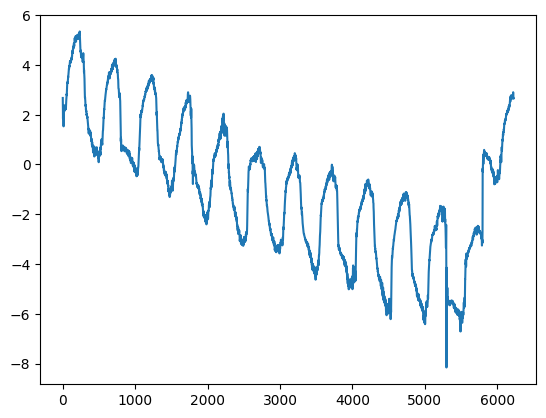

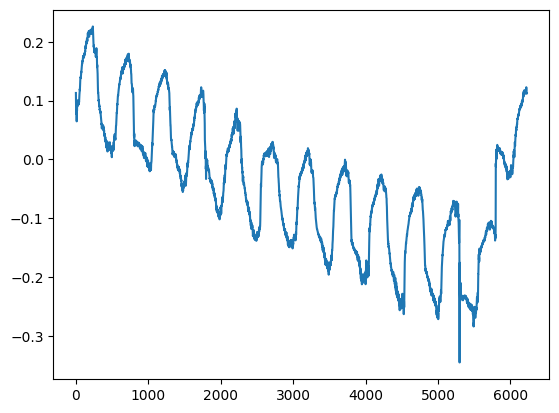

In [112]:
wavelength = 532e-9
centroid_y = np.unwrap(centroid_y)
centroid_y = np.unwrap(phase_kalman)

diff_phase = centroid_y - np.append([centroid_y[0]], np.diff(centroid_y))
plt.plot(tval_vec, centroid_y)
#plt.plot(tval_vec, diff_phase)
z = centroid_y/(2*np.pi)*wavelength/2

plt.figure()
plt.plot(tval_vec, z/1e-6)


### Displacement calc (nano)

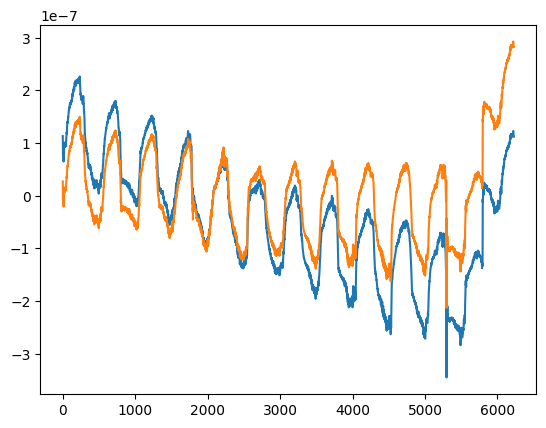

In [113]:
t_step = 1

t_interp = np.arange(tval_vec.min(), tval_vec.max(), t_step)
z_interp = np.interp(t_interp, tval_vec, z)

plt.plot(t_interp, z_interp)

z_detrend = scipy.signal.detrend(z_interp)
plt.plot(t_interp, z_detrend)


### FFT for finding main frequency of the signal

(0.0, 4000.0)

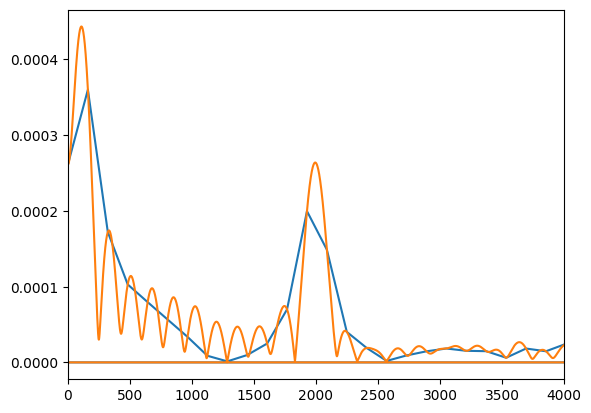

In [116]:
a = np.pad(z_interp, len(z_interp)*2)
a = np.pad(z_interp, 2**20-1)


ft = np.fft.fft(z_interp)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

ft = np.fft.fft(a)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

plt.xlim(0, 4000)

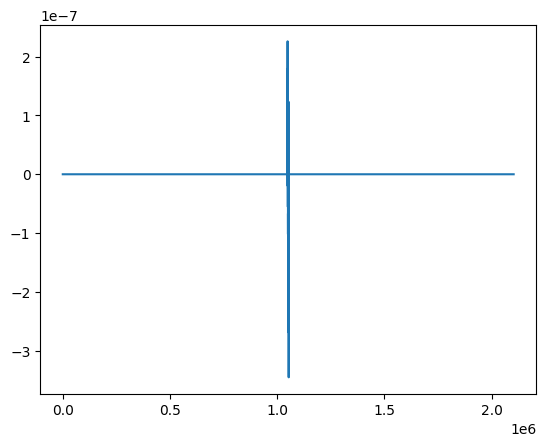

In [117]:
#a = np.pad(z_interp, len(z_interp)*2)

plt.plot(a)